# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [226]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file ='/Users/tridibdutta/Documents/COURSES/Udacity/SDC/Term1/Proj2_TrafficSign/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
testing_file ='/Users/tridibdutta/Documents/COURSES/Udacity/SDC/Term1/Proj2_TrafficSign/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [227]:
print(X_train.shape)
print(X_test.shape)
print(len(set(y_train)))
print(train['sizes'])
print(train['coords'][0])

(39209, 32, 32, 3)
(12630, 32, 32, 3)
43
[[29 30]
 [30 30]
 [30 30]
 ..., 
 [58 62]
 [63 69]
 [68 69]]
[ 5  6 24 25]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [228]:
import tensorflow as tf
import cv2
import random


tf.__version__

'0.11.0'

In [229]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [230]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

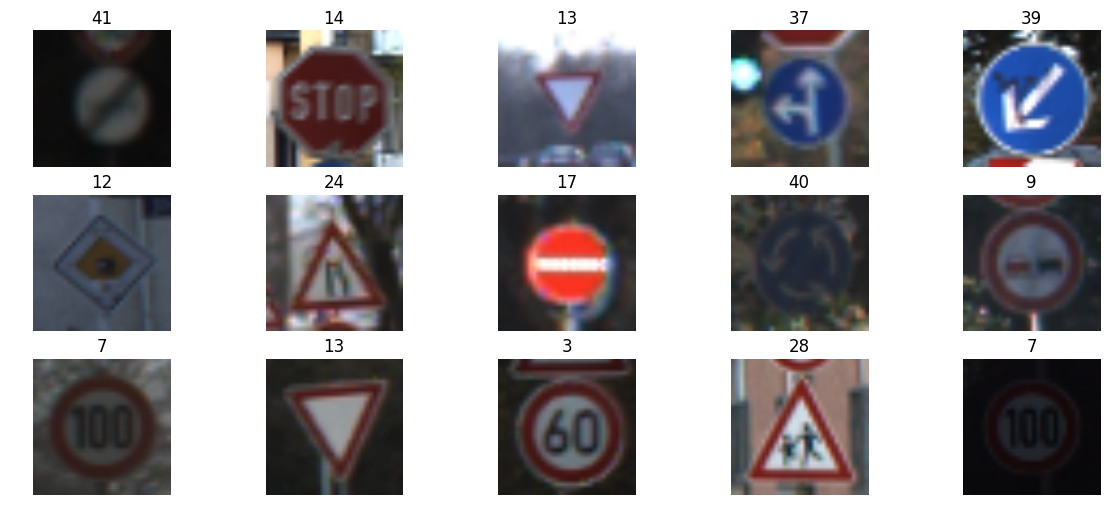

In [231]:
import random

fig, axs = plt.subplots(3,5, figsize=(15,6))
fig.subplots_adjust(hspace = .2, wspace = 0.001)
axs = axs.ravel()
for i in range(15):
    index = random.randint(0,len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])
    


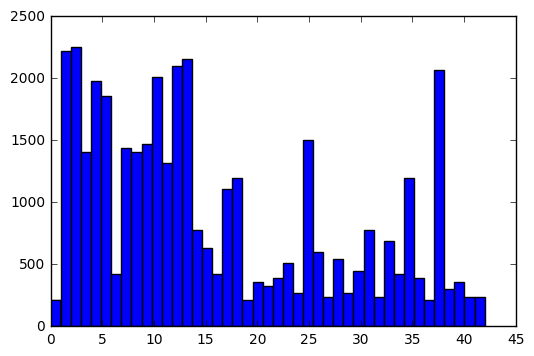

In [232]:
#get histogram of the number of images for each of the classes
g = plt.hist(y_train, bins= n_classes)


In [233]:
def plot_images(images, cls_true, nrow=3,ncol=3,cls_pred=None):
    assert len(images) == len(cls_true)
    
    #create 3 x 3 subplots
    fig, axes = plt.subplots(nrow,ncol,figsize=(12,6))
    fig.subplots_adjust(hspace =0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(images[i].reshape((32,32)), cmap = 'gray')        
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i],cls_pred[i])
            
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [234]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# import numpy as np
# from skimage.color import rgb2gray
# # convert to grayscale
# X_train_color = X_train
# X_test_color = X_test

# X_train_gray = np.mean(X_train, axis = 3, keepdims = True)
# X_test_gray = np.mean(X_test, axis = 3, keepdims = True)

# #X_train_gray = rgb2gray(X_train)
# #X_test_gray = rgb2gray(X_test)


# print("Color shape:", X_train_color.shape)
# print("Gray Shape: ", X_train_gray.shape)

Color shape: (39209, 32, 32, 3)
Gray Shape:  (39209, 32, 32, 1)


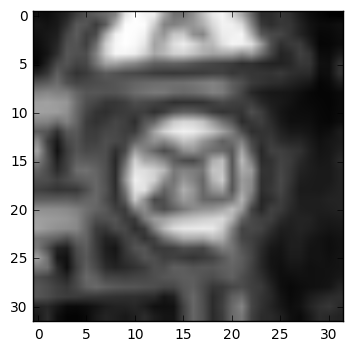

In [235]:
#plt.imshow(X_train_gray[0].squeeze(), cmap = 'gray')

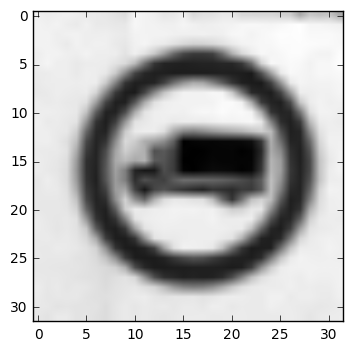

In [236]:
#plt.imshow(X_test_gray[0].squeeze(), cmap = 'gray')

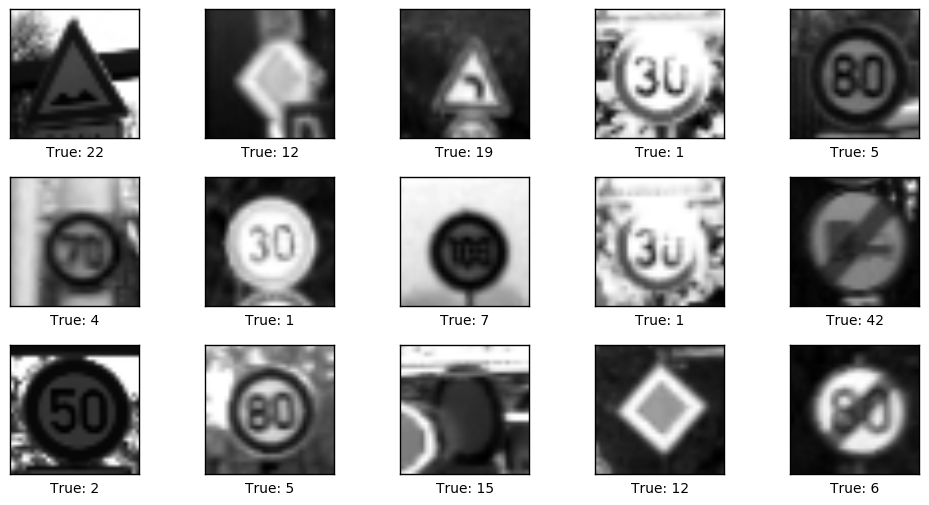

In [380]:
#visualize random images
import random

x = [random.randint(0,n_train) for i in range(0,15)]

images = X_train_gray[x]

plot_images(images= images , cls_true=y_train[x],nrow=3,ncol=5)

In [381]:
print(np.bincount(y_train))
print("minimum bin count for any class label: ", min(np.bincount(y_train)))

[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
minimum bin count for any class label:  210


In [382]:
#DELETE THIS 
# for class_n in range(n_classes):
#     class_indices = np.where(y_train == class_n)
#     n_samples = len(class_indices[0])
#     print('class:{}, num_samples: {}'.format(class_n,n_samples))
#     if n_samples < 500:
#         for i in range(500-n_samples):
#             new_img = X_train_gray[class_indices[0][i%n_samples]]
#             #print(new_img.shape)
#             with tf.Session():
#                 new_img = tf.image.flip_left_right(new_img)
#                 new_img = tf.image.random_brightness(new_img, max_delta = 0.3, seed = 44)
#                 new_img = new_img.eval()
#             #print(new_img.shape)    
#             X_train_gray = np.concatenate( (X_train_gray, [new_img]), axis = 0)
#             y_train = np.concatenate((y_train, [class_n]), axis = 0)
    
            
# print(X_train_gray.shape)
# print(y_train.shape)          

In [1]:
# print(X_train_gray.shape)

# g = plt.hist(y_train, bins= n_classes)

In [74]:
# # DEFINE pre_process_function to change the brightness, contrast and normalize


def preprocess(X, equlizeHistogram = True):
     # GET THE Y CHANNEL..ESSENSTIALLY GRAYSCALING
    X = np.array([np.expand_dims( cv2.cvtColor(img, cv2.COLOR_RGB2YUV)[:,:,0] ,2) for img in X])
    print(X.shape)
    
    if equlizeHistogram:
        X = np.array([np.expand_dims(cv2.equalizeHist(np.uint8(img).squeeze()) ,2) for img in X])
        
    X = np.float32(X)
    
    #normalize
    
    X -= np.mean(X,axis=0)
    X /= (np.std(X,axis=0) + np.finfo('float32').eps )
    
    return X

In [75]:
X_train_gray_norm = preprocess(X_train)
X_test_gray_norm = preprocess(X_test)

(39209, 32, 32, 1)
(12630, 32, 32, 1)


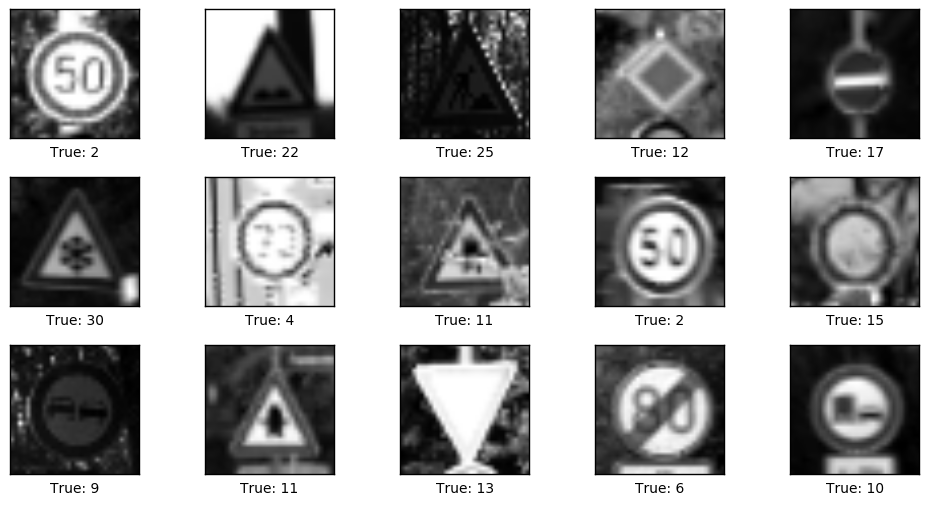

In [80]:
#plot random processed images from the image tensor
x = [random.randint(0,n_train) for i in range(0,15)]

images = X_train_gray[x]

plot_images(images= images , cls_true=y_train[x],nrow=3,ncol=5)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

1. I converted the color images to grayscale images using by taking the average of the elements in the 4th dimension, the RGB dimension. Conversion to grayscale makes it easy as we don't have to deal with all the color channels seperately.

2. Following the suggestion of the CS231n (stanford course:  course notes http://cs231n.github.io/neural-networks-2/, I have first split the `X_train` into 80/20 ratio into training set (`xTrain`) and validation set (`xVal`). Then centered the images by subtracting the mean of `xTrain`. The test set (`X_test`) is similarly treated. This is helpful in optimization step.



In [386]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [384]:
from sklearn.utils import shuffle
X_train_gray, y_train = shuffle(X_train_gray, y_train)



In [385]:
print('Training set shape:{} and label set shape:{}'.format(X_train_gray.shape, y_train.shape))

Training set shape:(39209, 32, 32, 1) and label set shape:(39209,)


In [386]:
#split into a training set and validation set

from sklearn.model_selection import train_test_split

xTrain,xVal, yTrain,yVal = train_test_split(X_train_gray, y_train, test_size = 0.2, random_state = 144)

print('X_train_gray shape', len(X_train_gray))
print('New xTrain shape', len(xTrain))
print('xVal set size', len(xVal))

X_train_gray shape 39209
New xTrain shape 31367
xVal set size 7842


In [387]:
#following the advice in cs231n course (stanford: http://cs231n.github.io/neural-networks-2/)
def centeringData(X,mean):
    X -= mean
    return X


xTrain = centeringData(xTrain,mean=np.mean(xTrain,axis=0)) #zero-center the data 
xVal = centeringData(xVal,mean= np.mean(xTrain,axis=0))

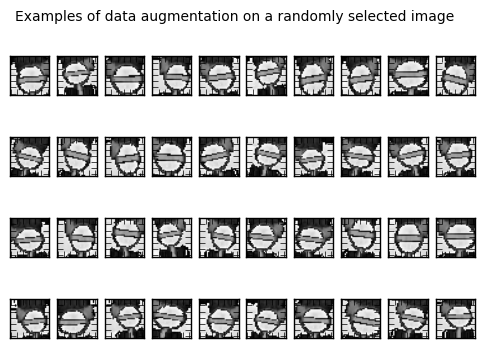

In [388]:
from keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator(rotation_range=15.,
                                  zoom_range = 0.2,
                                  width_shift_range=0.1,
                                  height_shift_range =0.1,
                                  horizontal_flip = True)



randIndex = random.randint(0,len(xTrain))
img_rgb = xTrain[randIndex]    
rows, cols = 4, 10
fig, ax_array = plt.subplots(rows, cols)
for ax in ax_array.ravel():
    augmented_img, _ = image_datagen.flow(np.expand_dims(img_rgb, 0), y_train[0:1]).next()
    ax.imshow(np.uint8(augmented_img.squeeze()),cmap='gray')
plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
plt.suptitle('Examples of data augmentation on a randomly selected image')
plt.show()

    

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I have used the scikit-learn's function, `train_test_split()` to seperate the `X_train` into two subsets: `xTrain` and `xVal`. The split is performed at 80/20 ratio. That gives us `31367` data points for training and `7842` data points for validating set. The test set is left untouched at this point as we would ideally like to see the test accuracy once we obtain the final model.

### Original LaNet architechture

In [389]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#import tensorflow as tf

EPOCHS = 60

BATCH_SIZE = 128


mu = 0

sigma = np.sqrt(2.0/n_train) #0.1 following cs231n suggestions



In [390]:
#configuration of the neural network

#Layer 1
filter_size1 = 5  #convolution filters are 5 x 5 pixesl
num_filter1 = 6   #There are 6 of these filters

#Layer 2
filter_size2 = 5  #convolution filters are 5 x 5 pixels
num_filter2 = 16  #There are 16 of these filters

#Fully Connected Layer
fc_size1 = 120 #120    #1ST Fully connected layer output size (from flattened layer 2)
fc_size2 = 84 #84     #2ND Fully Connected layer 

keep_prob = 0.5


In [391]:
def new_weights(shape, mean= mu, stddev = sigma):
    return tf.Variable(tf.truncated_normal(shape, mean = mean, stddev = stddev))

In [392]:
def new_biases(numberOfFilters):
    return tf.Variable(tf.zeros(numberOfFilters))

In [393]:
def new_conv_layer(input,             # Input: The previous layer
                  num_input_channels, # Num of channels in prev. layer (1 for input layer as the pics are grayscaled)
                  filter_size,        # Width and Height of the filters
                  num_filters,        # Number of filters
                  use_pooling=True):  # Use 2x2 pooling
    
    shape = [filter_size, filter_size,num_input_channels, num_filters]
    weights = new_weights(shape=shape)
    biases = new_biases(numberOfFilters = num_filters)
    
    layer = tf.nn.conv2d(input=input,
                        filter = weights,
                        strides = [1,1,1,1],
                        padding = 'VALID')
    
    #add the biases
    layer += biases
    
    #Apply the RelU activation function
    layer = tf.nn.relu(layer) 
    
    #pooling 
    if use_pooling:
        layer = tf.nn.max_pool(value = layer,
                               ksize = [1,2,2,1],
                               strides = [1,2,2,1],
                               padding = 'VALID')
        
    return layer, weights

In [394]:
def flatten_layer(layer):
    layer_shape = layer.get_shape()
    
    # the shape of the input layer is assumed to be:
    # layer_shape = [num_images, img_height, img_width, num_channels]
    # number of features: img_height*img_width*num_channels
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(layer, [-1, num_features])
    
    return layer_flat, num_features

In [395]:
def new_fc_layer(input,        #previous layer 
                num_inputs,    #num. inputs from prev. layer
                num_outputs,   #num.outputs
                use_relu=True):#use rectified Linear Unit (ReLU)
    
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(numberOfFilters=num_outputs)
    
    layer = tf.matmul(input, weights) + biases
    
    if use_relu:
        layer = tf.nn.relu(layer)
    
    return layer

In [396]:
def myLeNet(x):
    #convolution layer 1
    layer_conv1,weights_conv1 = \
        new_conv_layer(input= x,
                      num_input_channels = 1,
                      filter_size = filter_size1,
                      num_filters = num_filter1)
    print("layer_conv1:{}".format(layer_conv1))
    
    #drop 50%
    #drop_conv1 = tf.nn.dropout(layer_conv1, keep_prob = 0.7)
    
    #additional flattened layer to be concatenated later
    layer_flat1, num_features1 = flatten_layer(layer_conv1)
    print("layer_flat1:{} and num_features1:{}".format(layer_flat1, num_features1))
    
    #experiment1 (successful)
    #additional convolution and  flattening then concatenate with layer_flat1, layer_flat2
    #filter size used: 3 x 3, num_filter = 12
    
#     layer_conv1A, weights_conv1A = \
#         new_conv_layer(input=x,
#                       num_input_channels = 1,
#                       filter_size = 3,
#                       num_filters= 12)
     
#     print("layer_conv1A:{}".format(layer_conv1A))
    
    #drop 
    #drop_conv1A = tf.nn.dropout(layer_conv1A, keep_prob= keep_prob)
    
    ## flattening of this layer
    #layer_flat1A, num_features1A = flatten_layer(layer_conv1A)
    #print("layer_flat1A:{} and num_features1A: {}".format(layer_flat1A, num_features1A))
    
    
    #convolution layer 2
    layer_conv2, weights_conv2 = \
        new_conv_layer(input=layer_conv1,
                      num_input_channels = num_filter1,
                      filter_size = filter_size2,
                      num_filters = num_filter2)
    
    print("layer_conv2:{}".format(layer_conv2))
    
    #drop 50%
    #drop_conv2 = tf.nn.dropout(layer_conv2, keep_prob=0.7 )

    #flatten layer
    layer_flat2, num_features2 = flatten_layer(layer_conv2)
    print("layer_flat2:{} and num_features2: {}".format(layer_flat2, num_features2))
    
    #concatenate the flattened layer 1, layer 1A,  and layer 2
    
    layer_flat = tf.concat(1,[layer_flat1,layer_flat2])
    
    num_features = num_features1 + num_features2
    
    print("layer_flat:{} and num_features: {}".format(layer_flat, num_features))

    #fully connected layer 1
    layer_fc1 = new_fc_layer(input = layer_flat,
                            num_inputs = num_features,
                            num_outputs = fc_size1,
                            use_relu = True)
    
    print("layer_fc1:{}".format(layer_fc1))
    
    #drop 50%
    
    drop_fc1 = tf.nn.dropout(layer_fc1, keep_prob=0.5)
    

    #fully connected layer 2
    layer_fc2 = new_fc_layer(input = drop_fc1, 
                            num_inputs = fc_size1,
                            num_outputs = fc_size2,
                            use_relu = True)
    print("layer_fc2:{}".format(layer_fc2))
    
    #drop out layer 
    drop_fc2 = tf.nn.dropout(layer_fc2, 0.5)
    
    #fully connected layer 3
    output_layer = new_fc_layer(input = drop_fc2,
                                 num_inputs = fc_size2,
                                 num_outputs = n_classes,
                                 use_relu = False)
    

    print("output_layer:{}".format(output_layer))
    
    return output_layer



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

There are two convolutional layers and two fully connected layers along with an outer layer. Below are the specifics of the model architecture:

1. Convolutional Layer 1: 5 x 5 Convolution (in: 32 x 32 x 1, out: 28 x 28 x 1)
2. ReLU --> max_pooling (2 x 2)
3. Convolutional Layer 2: 5 x 5 Convolution (in: 28 x 28 x 1, out: 14 x 14 x 1)  
4. ReLU --> max_pooling (2 x 2)
5. Flatten layers (flatter layer 1 and flatten layer 2) concatenated 1176 + 400 = 1576
6. Fully Connected layer 1: (in: 1576, out: 120)
7. Dropout layer
8. Fully Connected layer 2: (in: 120,  out: 84)
9. Dropout layer
10. Outerlayer (in: 84, out: 43(no. of classes))

In [397]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [404]:
#placeholder variables

tf.reset_default_graph()

x = tf.placeholder(tf.float32,(None,32,32,1) )
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,n_classes) #n_classes is 43


In [405]:
rate = 0.0009

logits = myLeNet(x)
#logits = LeNet2(x)

y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension = 1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer_conv1:Tensor("MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
layer_flat1:Tensor("Reshape:0", shape=(?, 1176), dtype=float32) and num_features1:1176
layer_conv2:Tensor("MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)
layer_flat2:Tensor("Reshape_1:0", shape=(?, 400), dtype=float32) and num_features2: 400
layer_flat:Tensor("concat:0", shape=(?, 1576), dtype=float32) and num_features: 1576
layer_fc1:Tensor("Relu_2:0", shape=(?, 120), dtype=float32)
layer_fc2:Tensor("Relu_3:0", shape=(?, 84), dtype=float32)
output_layer:Tensor("add_4:0", shape=(?, 43), dtype=float32)


In [406]:
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x,batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y:batch_y})
        total_accuracy += (accuracy*len(batch_x))
    return total_accuracy/num_examples
    


### Train the model

In [407]:
BATCHES_PER_EPOCH = 500

In [408]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    #sess.run(tf.global_variables_initializer())
    num_examples = len(xTrain)
    print("Training.....")
    print()
    for i in range(EPOCHS):
        xTrain,yTrain = shuffle(xTrain,yTrain)
#         batch_counter = 0
#         for batch_x, batch_y in image_datagen.flow(xTrain, yTrain, batch_size=BATCH_SIZE):
#             batch_counter += 1
#             sess.run(training_operation, feed_dict={x:batch_x,y:batch_y})
#             if batch_counter == BATCHES_PER_EPOCH:
#                 break
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = xTrain[offset:end], yTrain[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x,y:batch_y})
        validation_accuracy = evaluate(xVal, yVal)
        train_accuracy = evaluate(X_train_gray, y_train)
        print("EPOCH {}.....".format(i+1))
        print("Train Accuracy = {:.3f} - Validation Accuracy = {:.3f}".format(train_accuracy, validation_accuracy))
        print()
        saver.save(sess, save_path = '../checkpoints/traffic_sign_model.ckpt', global_step = i)
    print("Model saved")

Training.....

EPOCH 1.....
Train Accuracy = 0.519 - Validation Accuracy = 0.528

EPOCH 2.....
Train Accuracy = 0.665 - Validation Accuracy = 0.668

EPOCH 3.....
Train Accuracy = 0.734 - Validation Accuracy = 0.731

EPOCH 4.....
Train Accuracy = 0.776 - Validation Accuracy = 0.774

EPOCH 5.....
Train Accuracy = 0.801 - Validation Accuracy = 0.785

EPOCH 6.....
Train Accuracy = 0.814 - Validation Accuracy = 0.807

EPOCH 7.....
Train Accuracy = 0.813 - Validation Accuracy = 0.806

EPOCH 8.....
Train Accuracy = 0.821 - Validation Accuracy = 0.807

EPOCH 9.....
Train Accuracy = 0.835 - Validation Accuracy = 0.827

EPOCH 10.....
Train Accuracy = 0.803 - Validation Accuracy = 0.799

EPOCH 11.....
Train Accuracy = 0.849 - Validation Accuracy = 0.848

EPOCH 12.....
Train Accuracy = 0.851 - Validation Accuracy = 0.849

EPOCH 13.....
Train Accuracy = 0.863 - Validation Accuracy = 0.852

EPOCH 14.....
Train Accuracy = 0.859 - Validation Accuracy = 0.844

EPOCH 15.....
Train Accuracy = 0.867 - Val

In [410]:
# on untouched Test set

xTest = centeringData(X_test_gray, mean = np.mean(X_test_gray, axis=0))

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    #saver2 = tf.train.import_meta_graph('./mylenet.meta')
    #saver2.restore(sess,'./mylenet')
    saver.restore(sess,'../checkpoints/traffic_sign_model.ckpt-59')
    test_accuracy = evaluate(xTest,y_test)
    print("Test set accuracy = {:.3f}".format(test_accuracy))
    

Test set accuracy = 0.846


In [288]:
# def plot_errors(cls_pred,cls_true):
#     correct = cls_true == cls_pred
#     incorrect = (correct == False)
#     images = xTest[incorrect]
#     cls_pred = cls_pred[incorrect]
#     cls_true = y_test[incorrect]
#     plot_images(images = images[0:9], cls_true = cls_true[0:9], cls_pred = cls_pred[0:9], nrow=3, ncol=3)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_



**Answer:**

I used Adam optimzer from tensorflow library (as implemented in LeNet lab).

    * 1. batch size: 128
    * 2. epochs:      60
    * 3. learning rate: 0.0009
    * 4. mu = 0
    * 5. sigma = squart(2/no.of images)
    * 6. dropout probability: 0.5



### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

The final network architecture is based on both the LaNet archtecture, as implemented in the lab and the paper by Sarmanet and LeCun. In particular, the idea of concatenating the flattened layer 1 and 2 came from that paper. However, I failed to obtain a validation and testset accuracy of above 90%. I had tried variety of artechtures, but I couldn't get the accuracy above 90%.  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

/Users/tridibdutta/Documents/COURSES/Udacity/SDC/Term1/Proj2_TrafficSign/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/new_traffic_signs
['.DS_Store', 'keep_left.png', 'keep_right.png', 'No_entry.png', 'round_about_mandatary.png', 'speed_limit_60_kmph.png']


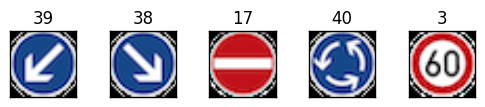

In [371]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os

print 
new_images_dir = '/Users/tridibdutta/Documents/COURSES/Udacity/SDC/Term1/Proj2_TrafficSign/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/new_traffic_signs'

print(new_images_dir)
new_test_images = [os.path.join(new_images_dir,f) for f in os.listdir(new_images_dir)]
new_test_images = new_test_images[1:]
new_test_images = [cv2.cvtColor(cv2.imread(f),cv2.COLOR_BGR2RGB) for f in new_test_images]

new_test_images = np.asarray(new_test_images)
new_test_labels = [39,38,17,40,3]
#print(new_test_images)

print(os.listdir(new_images_dir))

fig, axarray = plt.subplots(1,len(new_test_images), figsize=(6,3))
fig.subplots_adjust(hspace = 0.2, wspace=0.5)

for i, ax in enumerate(axarray.ravel()):
    ax.imshow(new_test_images[i])
    ax.set_title('{}'.format(new_test_labels[i]))
    plt.setp(ax.get_xticklabels(),visible=False)
    plt.setp(ax.get_yticklabels(),visible=False)
    ax.set_xticks([]),ax.set_yticks([])


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

All five pictures of sign are taken from the web. Nothing in particular stick out that seems it would be difficult for the estimator to classify these signs. 

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [376]:
new_test_images_gray = np.mean(new_test_images,axis=3, keepdims=True)

In [377]:
new_test_images_gray.shape

(5, 32, 32, 1)

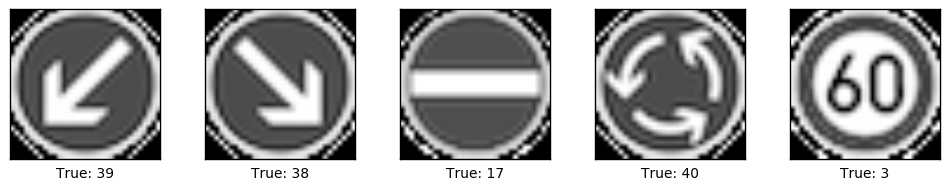

In [379]:
plot_images(new_test_images_gray,nrow=1,ncol=5,cls_true=new_test_labels)

In [409]:
#centering the data

new_test_images_gray = centeringDataDataData(new_test_images_gray, mean = np.mean(new_test_images_gray,axis=0))

In [412]:
with tf.Session() as sess:
    saver.restore(sess,'../checkpoints/traffic_sign_model.ckpt-59')
    
    predictions = np.argmax(np.array(sess.run(logits,feed_dict={x:new_test_images_gray})), axis=1)
    
for i, pred in enumerate(predictions):
    print('Image {}- Target = {:02d}, Predicted = {:02d}'.format(i,new_test_labels[i], pred))
    
print('Accuray: {:02f}'.format(np.sum(new_test_labels==predictions)/len(new_test_labels)))

Image 0- Target = 39, Predicted = 39
Image 1- Target = 38, Predicted = 38
Image 2- Target = 17, Predicted = 33
Image 3- Target = 40, Predicted = 40
Image 4- Target = 03, Predicted = 19
Accuray: 0.600000


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model accuracy on the new images is 60%. While the accuracy dropped, more images could have pushed up the percentage slightly higher.

Top 3 model predictions for image 0 (Target is 39)
   Prediction = 39 with confidence 0.00
   Prediction = 02 with confidence 0.00
   Prediction = 10 with confidence 0.01
Top 3 model predictions for image 1 (Target is 38)
   Prediction = 38 with confidence 1.00
   Prediction = 34 with confidence 0.00
   Prediction = 00 with confidence 0.00
Top 3 model predictions for image 2 (Target is 17)
   Prediction = 17 with confidence 1.00
   Prediction = 14 with confidence 0.00
   Prediction = 26 with confidence 0.00
Top 3 model predictions for image 3 (Target is 40)
   Prediction = 30 with confidence 0.23
   Prediction = 11 with confidence 0.13
   Prediction = 23 with confidence 0.24
Top 3 model predictions for image 4 (Target is 03)
   Prediction = 24 with confidence 0.00
   Prediction = 30 with confidence 0.00
   Prediction = 28 with confidence 0.00


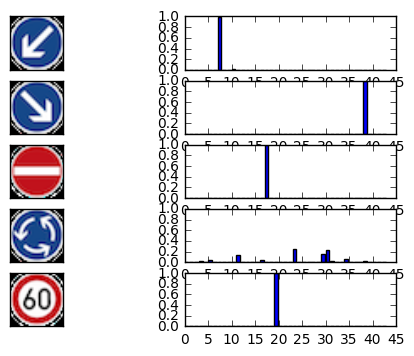

In [418]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess,'../checkpoints/traffic_sign_model.ckpt-59')
    K = 3
    top_3 = sess.run(tf.nn.top_k(logits,k=K), feed_dict={x:new_test_images_gray})
    
    softmax_prob = sess.run(tf.nn.softmax(logits), feed_dict={x:new_test_images_gray})
    
n_images = new_test_images_gray.shape[0]
fig, axarray = plt.subplots(n_images,2)

for r in range(0,n_images):
    axarray[r,0].imshow(new_test_images[r].squeeze())
    axarray[r,0].set_xticks([]), axarray[r,0].set_yticks([])
    plt.setp(axarray[r,0].get_xticklabels(), visible=False)
    plt.setp(axarray[r,0].get_yticklabels(), visible=False)
    axarray[r,1].bar(np.arange(n_classes), softmax_prob[r])
    axarray[r,1].set_ylim([0,1])
    
    
# print top K predictions of the model for each example, along with confidence (softmax score)    
for i in range(len(new_test_images)):
    print('Top {} model predictions for image {} (Target is {:02d})'.format(K, i, new_test_labels[i]))
    for k in range(K):
        top_c = top_3[1][i][k]
        print('   Prediction = {:02d} with confidence {:.2f}'.format(top_c, softmax_prob[i][top_c]))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model is only 60% certain. Two of the three correctly predicted classes has 100% certainty while the others are less certain. Although, as a first attempt to build such a classifier, it is encouraging, in reallife, these models achieved almost human like precision (>90% in LeCun,Samranet paper). So the model could be improved further. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.